In [2]:
import numpy as np
import cv2
from math import sqrt
import imutils
from matplotlib import pyplot as plt

Our template

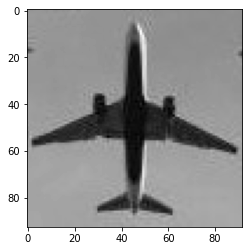

In [3]:
template = cv2.imread('TemplateIMG.jpeg',0)
plt.imshow(template, cmap = 'gray')

Our goal is to identify bounding box for each template in the source image

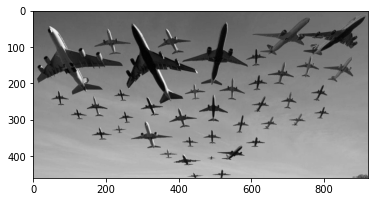

In [4]:
source = cv2.imread('SourceIMG.jpeg',0)
plt.imshow(source, cmap = 'gray')

In [5]:
# take the predominant color pixel from our template
# it will be usefull when we rotate the template, the black values will be replaced by our pixel value
value_counts = np.unique(template, return_counts = True)
pxVal = value_counts[0][np.argmax(value_counts[1])]

In [9]:
# We will resize the template between a given range
startWidth = 30
stopWidth = 270
stepWidth = 5
template = imutils.resize(template, width = startWidth)

In [10]:
# Also, we wil rotate the template within a given range with a step
start = -40
finish = 40
stepRot = 5

In [11]:
#storage for our bounding box coordinates
listCornerPoints = []

In [13]:
thDist = 45 # it is used to compare the distance between our bounding box. We don't want two or more rectangles to overlap on the same template
threshold = 0.63 # confident threshold for template matching

In [16]:
while startWidth < stopWidth:
    template = imutils.resize(template, width = startWidth)
    h,w = template.shape
    (cX, cY) = (w // 2, h // 2)
    start = -40
    finish = 40
    while start < finish:
        M = cv2.getRotationMatrix2D((cX, cY),start, 1.0)
        rotated = cv2.warpAffine(template, M, (w, h))
        rotated = np.where(rotated == 0, pxVal, rotated) # replace the black values with predominant pixel value for original template
        res = cv2.matchTemplate(source,rotated,cv2.TM_CCOEFF_NORMED) # it returns a matrix with the difference between template and every region from source image
        loc = np.where(res > threshold) # get only confident values higher that a threshold
        width,height = rotated.shape
        for i in range(len(loc[0])):
            x1 = loc[0][i]
            y1 = loc[1][i]
            x2 = x1 + width
            y2 = y1 + height
            cornerPoints = [x1,y1,x2,y2] # bounding box for actual template matching
            ok = 0
            for (a1,a2,b1,b2) in listCornerPoints: # check for prevent the overlap
                if sqrt(pow(a1-x1,2)+pow(a2-y1,2)) < thDist or sqrt(pow(b1-x2,2)+pow(b2-y2,2)) < thDist:
                    ok = 1
            if ok == 0:
                listCornerPoints.append(cornerPoints)
        start +=stepRot
        h,w = rotated.shape
        (cX, cY) = (w // 2, h // 2)
    startWidth = startWidth + stepWidth

Number of airplanes  : 26


True

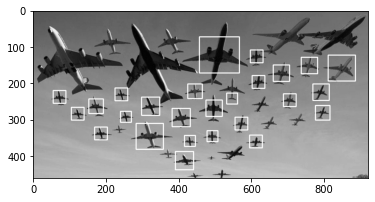

In [17]:
print(f'Number of airplanes  : {len(listCornerPoints)}')
for (x1,y1,x2,y2) in listCornerPoints:
    cv2.rectangle(source,(y1,x1),(y2,x2),(255,0,0),2)
plt.imshow(source,cmap='gray')
cv2.destroyAllWindows()
cv2.imwrite('result.jpeg',source)